In [ ]:
import pandas as pd

df=pd.read_excel("/content/Classes June 2018 Cleaned and preprocessed data.xlsx")
df1=pd.read_excel("/content/Cleaned and Preprocessed data Classes april-May 2018.xlsx")


In [ ]:
df.info()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1112 entries, 0 to 1111
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   ActivitySiteID                           1112 non-null   object        
 1   ActivityDescription                      1112 non-null   object        
 2   BookingEndDateTime (Month / Day / Year)  1112 non-null   datetime64[ns]
 3   BookingStartTime                         1112 non-null   object        
 4   MaxBookees                               1112 non-null   float64       
 5   Number Booked                            1112 non-null   float64       
 6   Price (INR)                              1112 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 60.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2177 entries, 0 to 2176
Data columns (total 7 columns):
 #   Column            

In [ ]:
# Prepare Data for Modeling:


# Extract the price column from both dataframes
price = df['Price (INR)']
price1 = df1['Price (INR)']

# Concatenate the price columns
price = pd.concat([price, price1])

# Check for missing values
missing_values = price.isnull().sum()

# If there are missing values, handle them (e.g., impute with mean or median)
if missing_values > 0:
  # Impute missing values with the median
  price = price.fillna(price.median())



# The price data is now prepared for modeling


In [ ]:
import statsmodels.api as sm

# Add a constant term to the data
X = sm.add_constant(price)

# Define the target variable
y = price

# Create a linear regression model
model = sm.OLS(y, X)

# Fit the model to the data
results = model.fit()

# Print the model summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:            Price (INR)   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.207e+32
Date:                Tue, 02 Jul 2024   Prob (F-statistic):               0.00
Time:                        21:32:46   Log-Likelihood:             1.0511e+05
No. Observations:                3289   AIC:                        -2.102e+05
Df Residuals:                    3287   BIC:                        -2.102e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.108e-16   5.57e-17     12.764      

In [ ]:


# Calculate R-squared
r_squared = results.rsquared

# Calculate Mean Squared Error (MSE)
mse = results.mse_resid

# Print model performance metrics
print("R-squared:", r_squared)
print("MSE:", mse)




R-squared: nan
MSE: nan


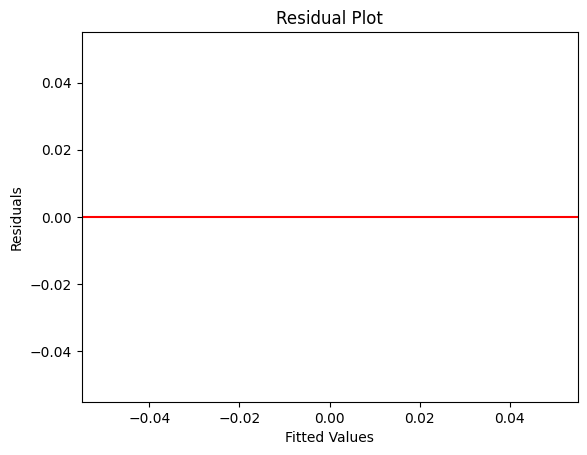

In [ ]:
# Plot residuals versus fitted values
import matplotlib.pyplot as plt

plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='red')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()